# Projeto Insight - House Rocket

## 1 Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly.express as px

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 2 Importando dataset

In [2]:
data = pd.read_csv('datasets\kc_house_data.csv')

## 3 Limpeza dos dados

### 3.1 Estrutura do dataset

In [3]:
print(f'Numero de linhas: {data.shape[0]}')
print(f'Numero de colunas: {data.shape[1]}')
data.head()

Numero de linhas: 21613
Numero de colunas: 21


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### 3.2 Transformação e visualização dos tipos

In [4]:
# Convertendo date de string para datetime
data['date'] = pd.to_datetime(data['date'])
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

#### Convertendo valores da coluna "floors"

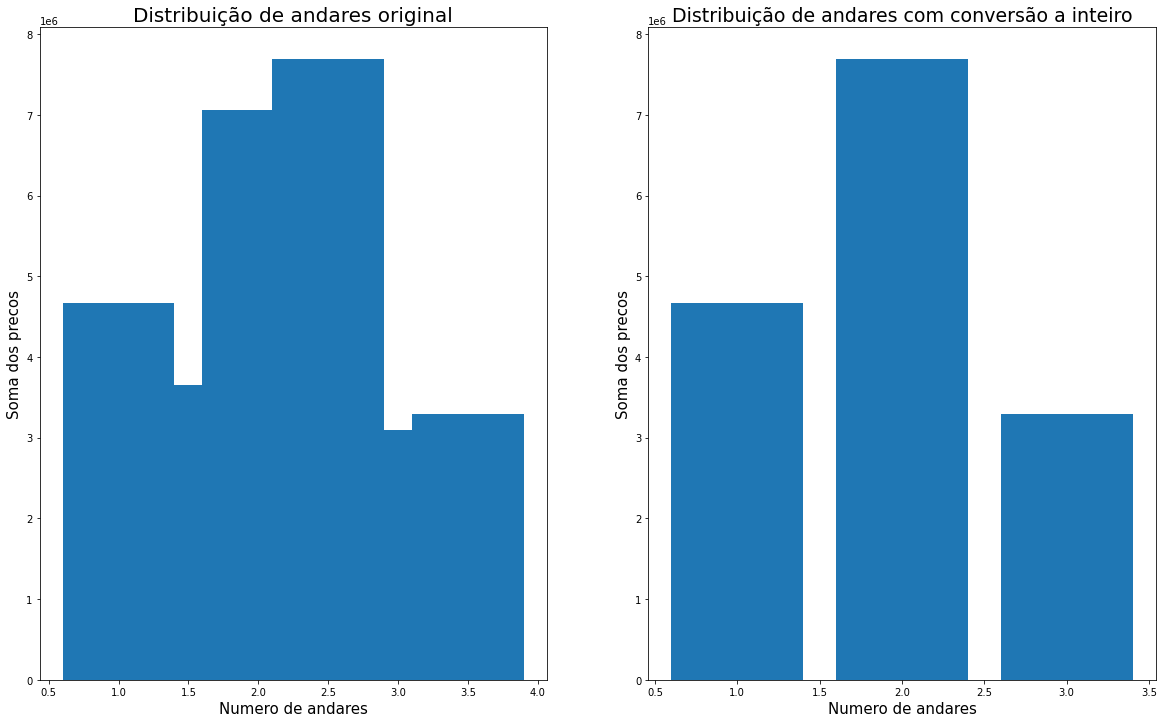

In [5]:
# Analizando distribuição de dados do "Floor" antes e depois da conversão
fig = plt.figure(figsize=(20,12))

specs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])

ax1.bar(x=data['floors'], height=data['price'])
ax1.set_title('Distribuição de andares original', fontsize=20)
ax1.set_xlabel('Numero de andares', fontsize=15)
ax1.set_ylabel('Soma dos precos', fontsize=15)

ax2.bar(x=data['floors'].astype(int), height=data['price'])
ax2.set_title('Distribuição de andares com conversão a inteiro', fontsize=19)
ax2.set_xlabel('Numero de andares', fontsize=15)
ax2.set_ylabel('Soma dos precos', fontsize=15)

# Convertendo andares para tipo int
data['floors'] = data['floors'].astype(int)

Observação: a função de conversão utilizada permite aos valores flutuantes se aproximarem dos valores inteiros diretamente anterior aos mesmos.

### 3.3 Verificação de variáveis faltantes

In [6]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 3.4 Verificação de outliers

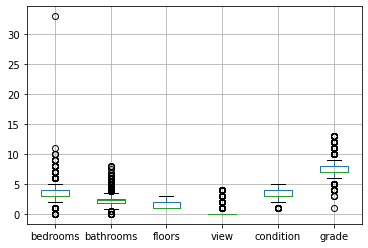

In [7]:
columns = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade']
data.boxplot(column=columns);

In [8]:
# Análise e remoção do Outlier em bedrooms
data[data['bedrooms'] == 33]
data.drop(data[data['bedrooms'] == 33].index, inplace=True)

## 4 Exploração de dados

### 4.1 Estatística Descritiva

In [9]:
# Removendo colunas não relevantes
columns=['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'view', 'condition', 
         'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
data[columns].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00
mean,540083.52,3.37,2.11,2079.92,15107.39,1.45,0.23,3.41,7.66,1788.43,291.50,1971.01,84.41,1986.58,12768.83
std,367135.06,0.91,0.77,918.46,41421.42,0.55,0.77,0.65,1.18,828.09,442.58,29.37,401.69,685.39,27304.76
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,399.00,651.00
25%,321837.50,3.00,1.75,1426.50,5040.00,1.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7619.00,1.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.25,2.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,2360.00,10083.25
max,7700000.00,11.00,8.00,13540.00,1651359.00,3.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,6210.00,871200.00


### 4.2 Feature Creation

In [10]:
df = data.copy()

# Delimitador entre imoveis antigas e novas (anteriores a 1955 serão consideradas antigas)
df.loc[df['yr_built'] < 1955, 'age_house'] = 'old'
df.loc[df['yr_built'] >= 1955, 'age_house'] = 'new'


# Imoveis com e sem porao
df.loc[df['sqft_basement'] == 0, 'basement'] = 'no'
df.loc[df['sqft_basement'] > 0, 'basement'] = 'yes'


# Coluna contendo apenas o ano da publicacao do imovel para a venda
df['year'] = pd.to_datetime(df['date']).dt.year


# Coluna contendo apenas o mês da publicacao do imovel para a venda
df['month'] = pd.to_datetime(df['date']).dt.month


# Coluna discriminando se o imovel foi ou nao renovado
df.loc[df['yr_renovated']== 0, 'is_renovated'] = 'no'
df.loc[df['yr_renovated'] > 0, 'is_renovated'] = 'yes'


# Coluna discriminando as estacoes do ano em que o imovel foi publicado a venda
bins = [0, 2, 5, 8, 11, 12]
df['season'] = pd.cut(df['month'], bins, labels=['winter', 'spring', 'summer', 'fall', 'winter'], ordered=False)


# Coluna para discriminar banheiros completos (chuveiro, pia, vaso) dos banheiros sem chuveiro
bathint = [0, 1, 2, 3,4 ,5, 6, 8]  # Banheiro com chuveiro
bathfloat = [0.5, 0.75, 1.25, 1.5, 1.75, 2.25, 2.5, 2.75, 3.25, 3.5, 3.75,
             4.25, 4.5, 4.75, 5.25, 5.5, 5.75, 6.25, 6.5, 6.75, 7.5 , 7.75] # Banheiro sem chuveiro

df.loc[df['bathrooms'].isin(bathint), 'complete_bathroom'] = 'yes'
df.loc[df['bathrooms'].isin(bathfloat), 'complete_bathroom'] = 'no'

### 4.3 Insights

##### Hipoteses:
H1: Imóveis que possuem vista para água, são 30% mais caros, na média.

H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

H3: Imóveis sem porão (sqft_basement), são 40% maiores do que com porão em media.

H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%

H5: Imóveis com 3 banheiros tem um crescimento MoM (Month over Month) de 15% em média

H6: Imóveis com reforma são 30% mais caros na média.

H7: Imóveis vendem 30% mais no verão na média

H8: Imóveis são 20% mais caros no verão na média.

H9: Imóveis com banheiros completos são 10% mais caros na média.

H10: Para cada andar do imóvel, o preço médio é 20% maior.

A hipótese 1 é verdadeira, pois imóveis com vista a água são 212.64% mais caros


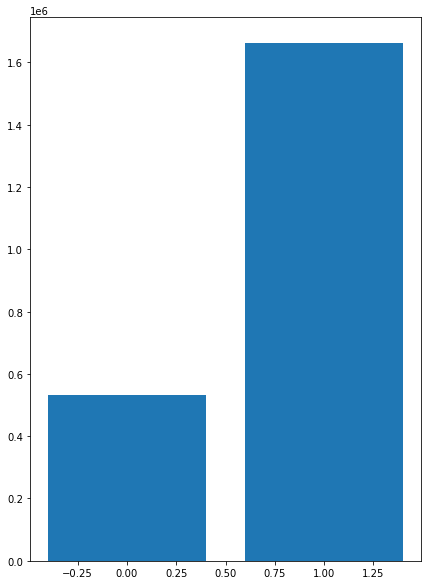

In [11]:
# H1: Imóveis que possuem vista para água, são 30% mais caros, na média.
h1 = df[['waterfront', 'price']].groupby('waterfront').mean().reset_index()

# Plot
fig = plt.figure(figsize=(7,10))
plt.bar(x=h1['waterfront'], height=h1['price'])

# Calculo de percentual e conclusão
h1_perc = (h1.loc[1,'price'] / h1.loc[0,'price'] - 1) * 100
print(f'A hipótese 1 é verdadeira, pois imóveis com vista a água são {h1_perc:.2f}% mais caros')

A hipótese 2 é falsa, pois imóveis com data de construção menor que 1955 são 0.79% mais barato


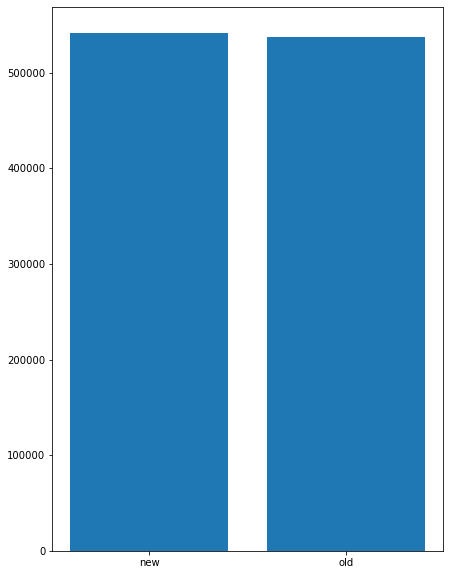

In [12]:
# H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
h2 = df[['age_house','price']].groupby('age_house').mean().reset_index()

# Plot
fig = plt.figure(figsize=(7,10))
plt.bar(x=h2['age_house'], height=h2['price'])

# Calculo de percentual e conclusão
h2_perc = (h2.loc[0,'price'] / h2.loc[1,'price']-1)*100
print(f'A hipótese 2 é falsa, pois imóveis com data de construção menor que 1955 são {h2_perc:.2f}% mais barato')

A hipótese 3 é falsa, pois imóveis sem porão são 22.56% maiores


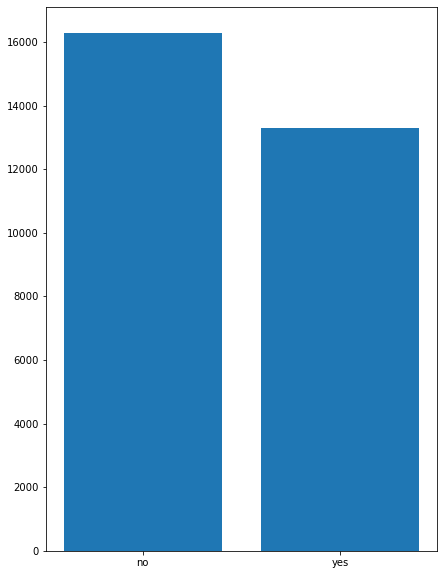

In [13]:
# H3: Imóveis sem porão (sqft_basement), são 40% maiores do que com porão em media.
h3 = df[['basement', 'sqft_lot']].groupby('basement').mean().reset_index()

# Plot
fig = plt.figure(figsize=(7,10))
plt.bar(x=h3['basement'], height=h3['sqft_lot'])

# Calculo de percentual e conclusão
h3_perc = (h3.loc[0,'sqft_lot'] / h3.loc[1,'sqft_lot']-1)*100
print(f'A hipótese 3 é falsa, pois imóveis sem porão são {h3_perc:.2f}% maiores')

A hipótese 4 é falsa, pois o crescimento ano a ano dos preços é 0.05% em média.


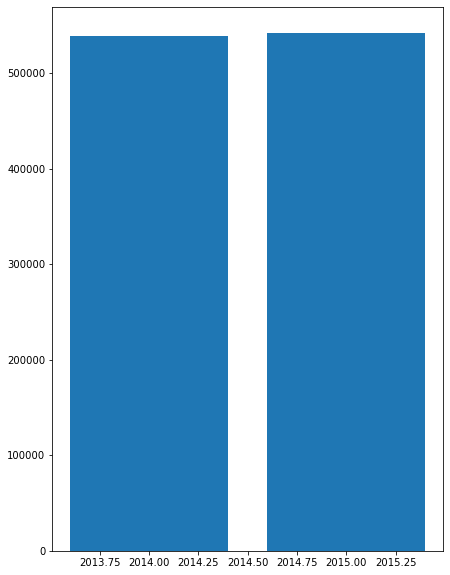

In [14]:
# H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%
h4 = df[['year','price']].groupby('year').mean().reset_index()

# plot
fig = plt.figure(figsize=(7,10))
plt.bar(x=h4['year'], height=h4['price'])

# Calculo de percentual e conclusão
h4_perc = (h4.loc[1,'year'] / h4.loc[0,'year']-1)*100
print(f'A hipótese 4 é falsa, pois o crescimento ano a ano dos preços é {h4_perc:.2f}% em média.')

A hipótese 5 é falsa, pois o crescimento mês a mês dos preços é de 0.99% em média.


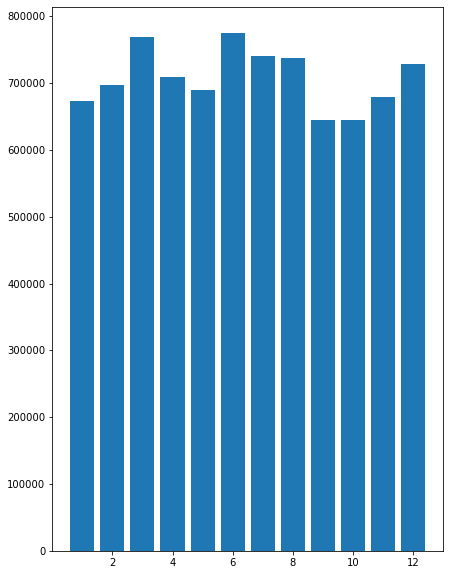

In [15]:
# H5: Imóveis com 3 banheiros tem um crescimento MoM (Month over Month) de 15% em média
h5 = df.copy()

h5 = h5[h5['bathrooms'] ==3]  # Filtragem para imoveis com 3 banheiros
h5 = h5[['bathrooms', 'month', 'price']].groupby('month').mean().reset_index()
h5.drop(columns='bathrooms', inplace=True)

# Plot
fig = plt.figure(figsize=(7,10))
plt.bar(x=h5['month'], height=h5['price'])

# Calculo de variacao percentual mes a mes
h5_perc = 0
for i in range(0, 11):
    var = (h5.iloc[i+1, 1] / h5.iloc[i, 1] *100) - 100
    h5_perc = h5_perc + var
h5_perc = h5_perc/11   

# Conclusao
print(f'A hipótese 5 é falsa, pois o crescimento mês a mês dos preços é de {h5_perc:.2f}% em média.')

A hipótese 6 é verdadeira, pois imóveis com reforma são 43.37% mais caros em média.


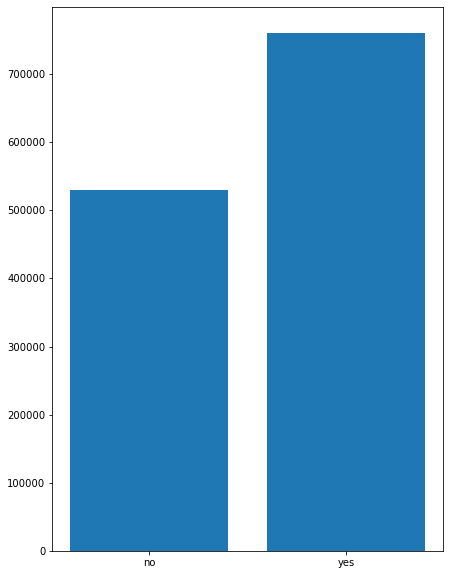

In [16]:
# H6: Imóveis com reforma são 30% mais caros na média.
h6 = df[['is_renovated', 'price']].groupby('is_renovated').mean().reset_index()

# Plot
fig = plt.figure(figsize=(7,10))
plt.bar(x=h6['is_renovated'], height=h6['price'])

# Calculo de percentual e conclusão
h6_perc = (h6.loc[1,'price'] / h6.loc[0,'price']-1)*100
print(f'A hipótese 6 é verdadeira, pois imóveis com reforma são {h6_perc:.2f}% mais caros em média.')

A hipótese 7 é falsa, pois os imóveis vendem 3.00% a menos no verão em comparação a primavera (maior estação de vendas).


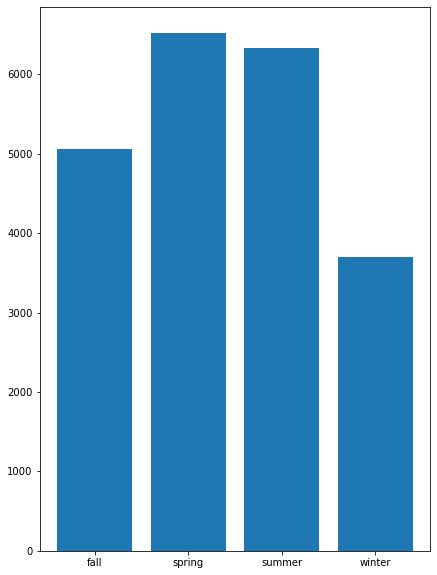

In [17]:
# H7: Imóveis vendem 30% mais no verão na média
h7 = df[['season', 'price']].groupby('season').count().reset_index()

# Plot
fig = plt.figure(figsize=(7,10))
plt.bar(x=h7['season'], height=h7['price'])

# Calculo de percentual e conclusão
h7_perc = (h7.loc[1,'price'] / h7.loc[2,'price']-1)*100
print(f'A hipótese 7 é falsa, pois os imóveis vendem {h7_perc:.2f}% a menos no verão em comparação a primavera (maior estação de vendas).')

A hipótese 8 é falsa, pois os imóveis em verão vendem 1.07% a menos do que na primavera (maior estação em preços).


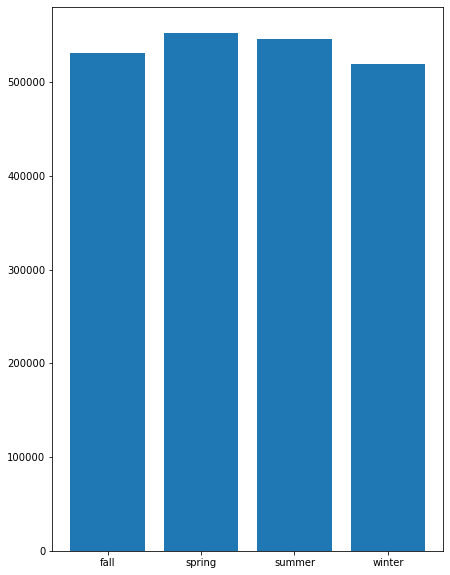

In [18]:
# H8: Imóveis são 20% mais caros no verão na média.
h8 = df[['season', 'price']].groupby('season').mean().reset_index()

# Plot
fig = plt.figure(figsize=(7,10))
plt.bar(x=h8['season'], height=h8['price'])

# Calculo de percentual e conclusão
h8_perc = (h8.loc[1,'price'] / h8.loc[2,'price']-1)*100
print(f'A hipótese 8 é falsa, pois os imóveis em verão vendem {h8_perc:.2f}% a menos do que na primavera (maior estação em preços).')

A hipótese 9 é falsa, pois os imóveis com banheiro completo vendem 30.53% a menos do que banheiros sem chuveiro.


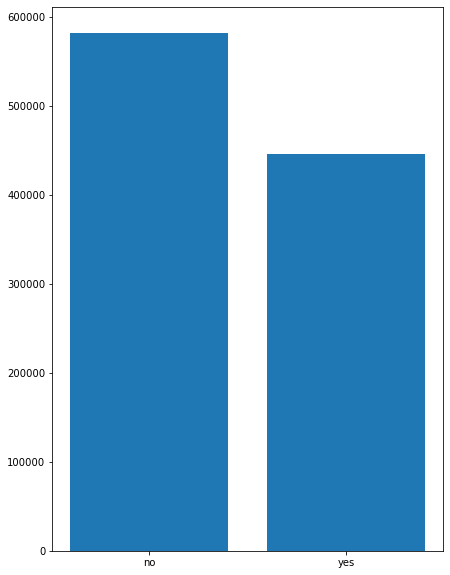

In [19]:
# H9: Imóveis com banheiros completos são 10% mais caros na média.
h9 = df[['complete_bathroom', 'price']].groupby('complete_bathroom').mean().reset_index()

# Plot
fig = plt.figure(figsize=(7,10))
plt.bar(x=h9['complete_bathroom'], height=h9['price'])

# Calculo de percentual e conclusão
h9_perc = (h9.loc[0,'price'] / h9.loc[1,'price']-1)*100
print(f'A hipótese 9 é falsa, pois os imóveis com banheiro completo vendem {h9_perc:.2f}% a menos do que banheiros sem chuveiro.')

A hipótese 10 é falsa, pois o crescimento do preço médio para cada andar é de aproximandamente 16.10%.


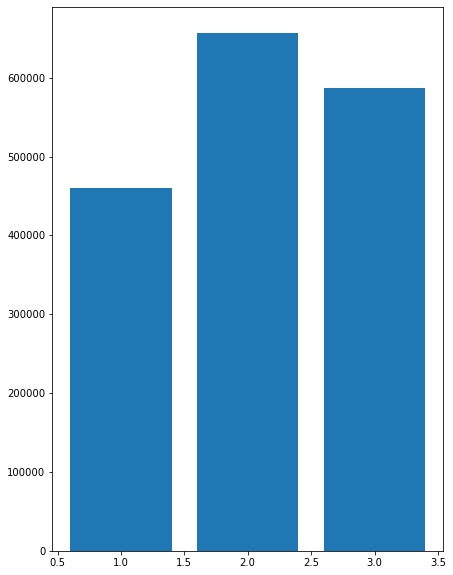

In [20]:
# H10: Para cada andar do imóvel, o preço médio é 20% maior.
h10 = df[['floors', 'price']].groupby('floors').mean().reset_index()

# Plot
fig = plt.figure(figsize=(7,10))
plt.bar(x=h10['floors'], height=h10['price'])

# Calculo de percentual para cada andar
h10_perc = 0
for i in range(0, 2):
    varh10 = (h10.iloc[i+1, 1] / h10.iloc[i, 1] *100) - 100
    h10_perc = h10_perc + varh10
        
h10_perc = h10_perc/2

# Conclusão
print(f'A hipótese 10 é falsa, pois o crescimento do preço médio para cada andar é de aproximandamente {h10_perc:.2f}%.')

### 4.4 Questão de negócio

#### 4.4.1 Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

##### Passos a serem tomados para a resolução:
- Agrupar os imóveis por região (zipcode).
- Dentro de cada região, encontrar a mediana do preço do imóvel.
- Sugerir os imóveis que estão abaixo do preço mediano da região e que estejam em boas condições e vista a água.
- Construir uma tabela com recomendações de compra ou não compra.


In [21]:
# Agrupamento por zipcode e mediana de cada região
df1m = df[['zipcode', 'price']].groupby('zipcode').median().reset_index()
df1m.rename(columns={"price": "price_median"}, inplace=True) # Renomear coluna


df1 = df.copy()
df1 = df1.drop_duplicates( subset=['id'], keep='last') # Removendo imoveis duplicados
df1 = pd.merge(df1, df1m, on='zipcode', how='inner') # inclusão do preco da mediana no dataset 

# Sugestao de compra ou nao com base na mediana do preco na regiao, condicao do imovel e vista a agua
for i in range (len(df1)):
    if (df1.loc[i, 'price_median'] > df1.loc[i, 'price']) & (df1.loc[i, 'condition'] >= 3) & (df1.loc[i, 'grade'] >= 7):
        df1.loc[i, 'status'] = 'buy'
    else:
        df1.loc[i, 'status'] = 'not buy'

In [22]:
# Escolhendo features utilizadas para analise
df3 = df1.copy()
df1 = df1[['id', 'zipcode', 'price', 'price_median', 'grade', 'condition', 'status']].sort_values('status')

# Gerando relatorio
df1.to_csv('datasets\kc_house_buy_report.csv', index=False) 

# Gerando relatorio geografico
df3[['id', 'zipcode', 'lat', 'long', 'price', 'price_median', 'grade', 'condition', 
     'status']].sort_values('status').to_csv('datasets\kc_house_buy_report_geo.csv', index=False) 


# Resultado
total = df1[df1['status'] == 'buy'].shape[0]
print(f'A quantidade de imóveis com condição de compra são de: {total} unidades')
perc = total/data.shape[0]*100
print(f'A quantidade corresponde a {perc:.2f}% dos dados totais.')
df1.head(15)

A quantidade de imóveis com condição de compra são de: 8578 unidades
A quantidade corresponde a 39.69% dos dados totais.


,id,zipcode,price,price_median,grade,condition,status
0,7129300520,98178,221900.00,278277.00,7,3,buy
11211,9558200025,98148,265000.00,278000.00,7,4,buy
11212,9558800025,98148,225000.00,278000.00,7,3,buy
11213,6121000110,98148,193000.00,278000.00,7,3,buy
11214,3223049131,98148,270000.00,278000.00,7,3,buy
11218,6123600100,98148,191000.00,278000.00,7,3,buy
11220,5071700020,98148,240000.00,278000.00,7,3,buy
11222,2923049421,98148,250000.00,278000.00,8,3,buy
11228,3223049158,98148,222200.00,278000.00,7,3,buy
11231,6123600090,98148,251200.00,278000.00,7,3,buy


#### 4.4.2 Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço?

##### Passos a serem tomados para a resolução:
- Agrupar os imóveis por região (zipcode) e por sazonalidade (Summer, Inter).
- Dentro de cada região e sazonalidade, calcular a mediana do preço.
- Condições de venda:
1. Se o preço da compra for maior que a mediana da região + sazonalidade. O preço da venda será igual ao preço da compra + 10%
1. Se o preço da compra for menor que a mediana da região + sazonalidade. O preço da venda será igual ao preço da compra + 30%


In [23]:
df2m = df.copy()
df2 = df.copy()

df2m = df2m[['zipcode', 'season', 'price']].groupby(['zipcode', 'season']).median().reset_index()
df2m.rename(columns={"price": "price_median"}, inplace=True) # Renomear coluna


df2 = df2.drop_duplicates( subset=['id'], keep='last') # Removendo imoveis duplicados
df2 = pd.merge(df2, df2m, on=['zipcode', 'season'], how='inner') # inclusão do preco da mediana no dataset 

# Sugestao de venda com base no preco mediano da regiao + temporada
for i in range (len(df2)):
    if df2.loc[i, 'price'] > df2.loc[i, 'price_median']:
        df2.loc[i, 'sell_price'] = float(df2.loc[i,'price']*10/100) + float(df2.loc[i, 'price'])
        df2.loc[i, 'profit'] = float(df2.loc[i,'price']*10/100)
    else:
        df2.loc[i, 'sell_price'] = float(df2.loc[i,'price']*30/100) + float(df2.loc[i, 'price'])
        df2.loc[i, 'profit'] = float(df2.loc[i,'price']*30/100)

In [24]:
# Escolhendo features utilizadas para analise
df4 = df2.copy()
df2 = df2[['id', 'zipcode', 'season', 'price', 'price_median', 'grade', 
           'condition', 'sell_price', 'profit']].sort_values('profit', ascending=False)

# Gerando relatorio
df2.to_csv('datasets\kc_house_sell_report.csv', index=False) 

# Resultado
df2.head(15)

,id,zipcode,season,price,price_median,grade,condition,sell_price,profit
15087,6762700020,98102,fall,7700000.00,740000.00,13,4,8470000.00,770000.00
21408,2210500010,98039,fall,2450000.00,2450000.00,11,3,3185000.00,735000.00
5487,9808700762,98004,summer,7062500.00,1149000.00,11,3,7768750.00,706250.00
21403,9208900037,98039,fall,6885000.00,2450000.00,13,3,7573500.00,688500.00
21378,2525049113,98039,summer,1950000.00,1950000.00,10,4,2535000.00,585000.00
21377,2425049066,98039,summer,1920000.00,1950000.00,9,4,2496000.00,576000.00
21400,6447300225,98039,fall,1880000.00,2450000.00,9,4,2444000.00,564000.00
21398,3262300818,98039,winter,1865000.00,1865000.00,11,3,2424500.00,559500.00
21365,2470100110,98039,summer,5570000.00,1950000.00,13,3,6127000.00,557000.00
21427,5425700205,98039,spring,1800000.00,1800000.00,9,3,2340000.00,540000.00


Observação: O relatório gerado acima possui a analise de vendas para todos os imóveis disponíveis

### 5 Resultados financeiros

Situação 1: Ao comprar apenas os indicados para compra conforme a primeira questão de negocio o resultado financeiro será:

In [25]:
# Filtrando o segundo relatório
df4.drop(columns=['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age_house', 'basement',
       'year', 'month', 'is_renovated', 'season', 'complete_bathroom',
       'price_median'], inplace=True)

# Junção do primeiro com o segundo relatório
df3 = pd.merge(df3, df4, on='id', how='inner')  

# Agrupando pela somatória de compra, venda e lucro bruto
dff = df3[['status', 'price', 'sell_price', 'profit']].groupby('status').sum().reset_index()
dff.drop(1, inplace=True)
dff

,status,price,sell_price,profit
0,buy,3535777760.00,4561543361.20,1025765601.20


#### Observações: 
 - O custo total de compra é de aproximadamente 3,535,777,760, o resultado bruto será de aproximadamente 4,561,543,361.20 e o lucro será de aproximadamente 1,025,765,601.20 correspondendo a 8,578 imóveis.
 - O lucro por imóvel é de aproximadamente 119,580.97

Situação 2: Ao realizar a compra de todos os imóveis o resultado financeiro será:

In [26]:
dff2 = df3[['price', 'sell_price', 'profit']].sum()
dff2 = pd.DataFrame(dff2)
dff2.T

,price,sell_price,profit
0,11610168601.00,13611834574.50,2001665973.50


#### Observações: 
 - O Custo total será de aproximadamente 11,610,168,601.00, o resultado bruto será de aproximadamente 13,611,834,574.50 e o lucro aproximado é de 2,001,665,973.50 correspondendo a 21,435 imóveis
 - O lucro aproximado por imóvel é de 93,383.06

### 6 Conclusão

 - A adoção da abordagem de compra com base nos indicadores apontados no relatório 1 permite um aumento do lucro de aproximadamente 28,05% por imóvel com um custo total aproximado de 228,36% a menos.